# Training TF net

In [1]:
import sys
sys.path.insert(0, '/braintree/home/bashivan/dropbox/Codes/3D_fMRI_CNN/tf_pipeline/')
import os
from tf_trainer import Trainer
import logging 
from tf_model import TFModel
from tf_dataset import TFDataset
from tf_trainer import log_info_string
import numpy as np
import tensorflow as tf
import numpy as np
FLAGS = tf.app.flags.FLAGS
os.environ['CUDA_VISIBLE_DEVICES'] = '0,2'

FLAGS.initial_learning_rate = 0.0001
FLAGS.batch_size = 64
FLAGS.num_gpus = 1
FLAGS.num_epochs_per_decay = 3
FLAGS.num_time_steps = 64
FLAGS.data_dir = '/braintree/data2/active/users/bashivan/Data/fmri_conv'


if FLAGS.fold_to_run == -1:
    fold_to_run = range(FLAGS.num_folds)
else:
    fold_to_run = [FLAGS.fold_to_run]

# Load the dataset
fold_pairs = []

model = TFModel()
dataset = TFDataset(data_dir=FLAGS.data_dir)
tr = Trainer(model=model, dataset=dataset)
print("Loading data...")
tr.load_data(random=False)

sub_nums = tr.subjects
subs_in_fold = np.ceil(np.max(sub_nums) / float(10))
# n-fold cross validation
fold_results = []
for i in fold_to_run:
    '''
    for each kfold selects fold window to collect indices for test dataset and the rest becomes train
    '''
    test_ids = np.bitwise_and(sub_nums >= subs_in_fold * (i), sub_nums < subs_in_fold * (i + 1))
    train_ids = ~ test_ids
    fold_pairs.append((np.nonzero(train_ids)[0], np.nonzero(test_ids)[0]))

train_dir = FLAGS.train_dir
log_info_string('Start working on fold(s) {0}'.format(fold_to_run))
for fold_num, fold in enumerate([fold_pairs[i] for i in fold_to_run]):
    log_info_string('Beginning fold {0} out of {1}'.format(fold_num + 1, len(fold_pairs)))
    FLAGS.train_dir = os.path.join(train_dir, str(fold_num))

    print('Splitting the data...')
    tr.split_data(fold)
    print('Preprocessing data...')
    tr.preprocess_data()

    fold_results.append(tr.train(fold_num=fold_num))

# Aggregate results and save as a pickle
fold_results = pd.concat(fold_results)
fold_results.to_pickle(
'cnn_{0}_results_sgd_{1}_fold{2}.pkl'.format(FLAGS.model_type, FLAGS.initial_learning_rate, ''.join([str(i) for i in fold_to_run])))
    

Loading data...
Start working on fold(s) [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Beginning fold 1 out of 10
Splitting the data...
Preprocessing data...
****************************************
subset: train
data_dir: /braintree/data2/active/users/bashivan/Data/fmri_conv
num_epochs_per_decay: 3
num_gpus: 1
train_dir: /braintree/data2/active/users/bashivan/results/temp/0
batch_size: 64
model_type: lstm
num_checkpoints_tosave: 5
initial_learning_rate: 0.0001
num_examples: None
num_epochs: 10
checkpoint_dir: .
learning_rate_decay_factor: 0.1
fold_to_run: -1
num_folds: 10
seed: 0
eval_dir: /om/user/bashivan/temp
num_time_steps: 64
log_device_placement: False
****************************************
Using ADAM optimizer...
Using default loss (softmax-Xentropy)...
Instructions for updating:
Use tf.losses.softmax_cross_entropy instead. Note that the order of the logits and labels arguments has been changed.


Instructions for updating:
Use tf.losses.softmax_cross_entropy instead. Note that the order of the logits and labels arguments has been changed.


Instructions for updating:
Use tf.losses.compute_weighted_loss instead.


Instructions for updating:
Use tf.losses.compute_weighted_loss instead.


Instructions for updating:
Use tf.losses.add_loss instead.


Instructions for updating:
Use tf.losses.add_loss instead.


total_params: 185650
2017-08-20 15:29:15.141713: step 0, loss = 0.69 (26.4 examples/sec; 2.421 sec/batch)
2017-08-20 15:30:00.739742: step 100, loss = 0.69 (160.4 examples/sec; 0.399 sec/batch)
2017-08-20 15:30:42.964705: step 200, loss = 0.67 (164.4 examples/sec; 0.389 sec/batch)
2017-08-20 15:31:29.863257: step 300, loss = 0.68 (162.4 examples/sec; 0.394 sec/batch)
Epoch 1 of 10 took 168.975s
  training loss:		0.680416
  training accuracy:		56.93 %
  validation loss:		0.640002
  validation accuracy:		67.95 %
Test results:
  test loss:			0.670807
  test accuracy:		62.00 %
2017-08-20 15:32:29.935195: step 400, loss = 0.64 (162.5 examples/sec; 0.394 sec/batch)
2017-08-20 15:33:16.532635: step 500, loss = 0.60 (160.2 examples/sec; 0.400 sec/batch)
2017-08-20 15:34:03.609891: step 600, loss = 0.62 (161.9 examples/sec; 0.395 sec/batch)
2017-08-20 15:34:52.646531: step 700, loss = 0.69 (164.5 examples/sec; 0.389 sec/batch)
Epoch 2 of 10 took 173.862s
  training loss:		0.638097
  training ac

Instructions for updating:
Use tf.losses.softmax_cross_entropy instead. Note that the order of the logits and labels arguments has been changed.


Instructions for updating:
Use tf.losses.compute_weighted_loss instead.


Instructions for updating:
Use tf.losses.compute_weighted_loss instead.


Instructions for updating:
Use tf.losses.add_loss instead.


Instructions for updating:
Use tf.losses.add_loss instead.


2017-08-20 16:03:40.600021: step 0, loss = 0.69 (45.1 examples/sec; 1.420 sec/batch)
2017-08-20 16:04:23.235531: step 100, loss = 0.69 (168.1 examples/sec; 0.381 sec/batch)
2017-08-20 16:05:04.419077: step 200, loss = 0.65 (162.9 examples/sec; 0.393 sec/batch)
2017-08-20 16:05:48.882968: step 300, loss = 0.65 (163.7 examples/sec; 0.391 sec/batch)
Epoch 1 of 10 took 159.493s
  training loss:		0.669659
  training accuracy:		60.56 %
  validation loss:		0.709189
  validation accuracy:		68.75 %
Test results:
  test loss:			0.754672
  test accuracy:		55.00 %
2017-08-20 16:06:49.928372: step 400, loss = 0.59 (165.2 examples/sec; 0.387 sec/batch)
2017-08-20 16:07:39.867306: step 500, loss = 0.61 (164.3 examples/sec; 0.389 sec/batch)
2017-08-20 16:08:32.404139: step 600, loss = 0.69 (165.4 examples/sec; 0.387 sec/batch)
Epoch 2 of 10 took 182.143s
  training loss:		0.601473
  training accuracy:		73.09 %
  validation loss:		0.680156
  validation accuracy:		72.47 %
Test results:
  test loss:			0.

Instructions for updating:
Use tf.losses.softmax_cross_entropy instead. Note that the order of the logits and labels arguments has been changed.


Instructions for updating:
Use tf.losses.compute_weighted_loss instead.


Instructions for updating:
Use tf.losses.compute_weighted_loss instead.


Instructions for updating:
Use tf.losses.add_loss instead.


Instructions for updating:
Use tf.losses.add_loss instead.


2017-08-20 16:41:47.421015: step 0, loss = 0.69 (47.4 examples/sec; 1.349 sec/batch)
2017-08-20 16:42:49.730589: step 100, loss = 0.69 (165.0 examples/sec; 0.388 sec/batch)
2017-08-20 16:43:53.510822: step 200, loss = 0.68 (163.6 examples/sec; 0.391 sec/batch)
2017-08-20 16:44:51.111341: step 300, loss = 0.69 (165.3 examples/sec; 0.387 sec/batch)
Epoch 1 of 10 took 220.879s
  training loss:		0.683019
  training accuracy:		56.14 %
  validation loss:		0.663785
  validation accuracy:		62.85 %
Test results:
  test loss:			0.684873
  test accuracy:		56.39 %
2017-08-20 16:46:14.671120: step 400, loss = 0.65 (158.6 examples/sec; 0.403 sec/batch)
2017-08-20 16:47:05.755738: step 500, loss = 0.61 (166.8 examples/sec; 0.384 sec/batch)
2017-08-20 16:48:07.575899: step 600, loss = 0.68 (165.2 examples/sec; 0.387 sec/batch)
Epoch 2 of 10 took 218.851s
  training loss:		0.642870
  training accuracy:		66.01 %
  validation loss:		0.617352
  validation accuracy:		72.74 %
Test results:
  test loss:			0.

Instructions for updating:
Use tf.losses.softmax_cross_entropy instead. Note that the order of the logits and labels arguments has been changed.


Instructions for updating:
Use tf.losses.compute_weighted_loss instead.


Instructions for updating:
Use tf.losses.compute_weighted_loss instead.


Instructions for updating:
Use tf.losses.add_loss instead.


Instructions for updating:
Use tf.losses.add_loss instead.


2017-08-20 17:19:27.668137: step 0, loss = 0.69 (42.2 examples/sec; 1.516 sec/batch)
2017-08-20 17:20:09.796803: step 100, loss = 0.69 (165.2 examples/sec; 0.387 sec/batch)
2017-08-20 17:20:50.490162: step 200, loss = 0.68 (161.1 examples/sec; 0.397 sec/batch)
2017-08-20 17:21:31.107878: step 300, loss = 0.67 (160.1 examples/sec; 0.400 sec/batch)
Epoch 1 of 10 took 149.143s
  training loss:		0.681101
  training accuracy:		56.82 %
  validation loss:		0.652806
  validation accuracy:		66.08 %
Test results:
  test loss:			0.664627
  test accuracy:		63.99 %
2017-08-20 17:22:26.059165: step 400, loss = 0.67 (168.3 examples/sec; 0.380 sec/batch)
2017-08-20 17:23:06.653210: step 500, loss = 0.66 (164.1 examples/sec; 0.390 sec/batch)
2017-08-20 17:23:47.684319: step 600, loss = 0.64 (163.5 examples/sec; 0.391 sec/batch)
Epoch 2 of 10 took 146.212s
  training loss:		0.634839
  training accuracy:		68.70 %
  validation loss:		0.689398
  validation accuracy:		63.68 %
2017-08-20 17:24:35.385268: ste

Instructions for updating:
Use tf.losses.softmax_cross_entropy instead. Note that the order of the logits and labels arguments has been changed.


Instructions for updating:
Use tf.losses.compute_weighted_loss instead.


Instructions for updating:
Use tf.losses.compute_weighted_loss instead.


Instructions for updating:
Use tf.losses.add_loss instead.


Instructions for updating:
Use tf.losses.add_loss instead.


2017-08-20 17:44:27.386842: step 0, loss = 0.70 (42.7 examples/sec; 1.500 sec/batch)
2017-08-20 17:45:09.966906: step 100, loss = 0.69 (160.5 examples/sec; 0.399 sec/batch)
2017-08-20 17:45:50.436969: step 200, loss = 0.70 (163.6 examples/sec; 0.391 sec/batch)
2017-08-20 17:46:31.050857: step 300, loss = 0.66 (143.4 examples/sec; 0.446 sec/batch)
Epoch 1 of 10 took 149.377s
  training loss:		0.681809
  training accuracy:		56.49 %
  validation loss:		0.553734
  validation accuracy:		85.49 %
Test results:
  test loss:			0.649153
  test accuracy:		65.94 %
2017-08-20 17:47:26.102467: step 400, loss = 0.59 (163.8 examples/sec; 0.391 sec/batch)
2017-08-20 17:48:06.782130: step 500, loss = 0.63 (166.3 examples/sec; 0.385 sec/batch)
2017-08-20 17:48:47.775142: step 600, loss = 0.58 (164.4 examples/sec; 0.389 sec/batch)
Epoch 2 of 10 took 146.403s
  training loss:		0.607821
  training accuracy:		72.23 %
  validation loss:		0.651332
  validation accuracy:		67.60 %
2017-08-20 17:49:35.540110: ste

Instructions for updating:
Use tf.losses.softmax_cross_entropy instead. Note that the order of the logits and labels arguments has been changed.


Instructions for updating:
Use tf.losses.compute_weighted_loss instead.


Instructions for updating:
Use tf.losses.compute_weighted_loss instead.


Instructions for updating:
Use tf.losses.add_loss instead.


Instructions for updating:
Use tf.losses.add_loss instead.


2017-08-20 18:09:27.607548: step 0, loss = 0.70 (43.3 examples/sec; 1.477 sec/batch)
2017-08-20 18:10:11.434951: step 100, loss = 0.69 (164.5 examples/sec; 0.389 sec/batch)
2017-08-20 18:10:51.629588: step 200, loss = 0.68 (163.8 examples/sec; 0.391 sec/batch)
2017-08-20 18:11:32.018738: step 300, loss = 0.64 (158.7 examples/sec; 0.403 sec/batch)
Epoch 1 of 10 took 149.749s
  training loss:		0.676409
  training accuracy:		58.32 %
  validation loss:		0.717621
  validation accuracy:		51.94 %
Test results:
  test loss:			0.620830
  test accuracy:		71.08 %
2017-08-20 18:12:26.391240: step 400, loss = 0.64 (164.5 examples/sec; 0.389 sec/batch)
2017-08-20 18:13:06.862371: step 500, loss = 0.62 (161.3 examples/sec; 0.397 sec/batch)
2017-08-20 18:13:47.158189: step 600, loss = 0.53 (163.7 examples/sec; 0.391 sec/batch)
Epoch 2 of 10 took 145.085s
  training loss:		0.600188
  training accuracy:		73.06 %
  validation loss:		0.802491
  validation accuracy:		57.57 %
Test results:
  test loss:			0.

Instructions for updating:
Use tf.losses.softmax_cross_entropy instead. Note that the order of the logits and labels arguments has been changed.


Instructions for updating:
Use tf.losses.compute_weighted_loss instead.


Instructions for updating:
Use tf.losses.compute_weighted_loss instead.


Instructions for updating:
Use tf.losses.add_loss instead.


Instructions for updating:
Use tf.losses.add_loss instead.


2017-08-20 18:34:55.410207: step 0, loss = 0.70 (42.2 examples/sec; 1.517 sec/batch)
2017-08-20 18:35:37.350411: step 100, loss = 0.70 (166.6 examples/sec; 0.384 sec/batch)
2017-08-20 18:36:17.509742: step 200, loss = 0.68 (165.3 examples/sec; 0.387 sec/batch)
2017-08-20 18:36:57.716895: step 300, loss = 0.63 (166.0 examples/sec; 0.385 sec/batch)
Epoch 1 of 10 took 147.693s
  training loss:		0.681593
  training accuracy:		56.56 %
  validation loss:		0.670868
  validation accuracy:		60.24 %
Test results:
  test loss:			0.657891
  test accuracy:		67.57 %
2017-08-20 18:37:52.068502: step 400, loss = 0.62 (162.3 examples/sec; 0.394 sec/batch)
2017-08-20 18:38:32.389477: step 500, loss = 0.63 (163.2 examples/sec; 0.392 sec/batch)
2017-08-20 18:39:12.874195: step 600, loss = 0.62 (163.4 examples/sec; 0.392 sec/batch)
Epoch 2 of 10 took 144.807s
  training loss:		0.619339
  training accuracy:		70.63 %
  validation loss:		0.620227
  validation accuracy:		70.90 %
Test results:
  test loss:			0.

Instructions for updating:
Use tf.losses.softmax_cross_entropy instead. Note that the order of the logits and labels arguments has been changed.


Instructions for updating:
Use tf.losses.compute_weighted_loss instead.


Instructions for updating:
Use tf.losses.compute_weighted_loss instead.


Instructions for updating:
Use tf.losses.add_loss instead.


Instructions for updating:
Use tf.losses.add_loss instead.


2017-08-20 18:59:58.039756: step 0, loss = 0.69 (45.2 examples/sec; 1.416 sec/batch)
2017-08-20 19:00:40.273533: step 100, loss = 0.68 (163.9 examples/sec; 0.391 sec/batch)
2017-08-20 19:01:20.471092: step 200, loss = 0.66 (165.2 examples/sec; 0.387 sec/batch)
2017-08-20 19:02:00.699907: step 300, loss = 0.61 (164.6 examples/sec; 0.389 sec/batch)
Epoch 1 of 10 took 147.806s
  training loss:		0.672245
  training accuracy:		59.10 %
  validation loss:		0.698312
  validation accuracy:		54.55 %
Test results:
  test loss:			0.742998
  test accuracy:		56.11 %
2017-08-20 19:02:54.958442: step 400, loss = 0.64 (164.5 examples/sec; 0.389 sec/batch)
2017-08-20 19:03:35.065499: step 500, loss = 0.62 (163.1 examples/sec; 0.392 sec/batch)
2017-08-20 19:04:15.378343: step 600, loss = 0.54 (166.3 examples/sec; 0.385 sec/batch)
Epoch 2 of 10 took 144.515s
  training loss:		0.589576
  training accuracy:		73.89 %
  validation loss:		0.766431
  validation accuracy:		52.81 %
2017-08-20 19:05:02.599355: ste

Instructions for updating:
Use tf.losses.softmax_cross_entropy instead. Note that the order of the logits and labels arguments has been changed.


Instructions for updating:
Use tf.losses.compute_weighted_loss instead.


Instructions for updating:
Use tf.losses.compute_weighted_loss instead.


Instructions for updating:
Use tf.losses.add_loss instead.


Instructions for updating:
Use tf.losses.add_loss instead.


2017-08-20 19:24:45.231028: step 0, loss = 0.70 (46.0 examples/sec; 1.392 sec/batch)
2017-08-20 19:25:27.371559: step 100, loss = 0.70 (167.0 examples/sec; 0.383 sec/batch)
2017-08-20 19:26:07.810079: step 200, loss = 0.67 (165.4 examples/sec; 0.387 sec/batch)
2017-08-20 19:26:48.405465: step 300, loss = 0.66 (164.3 examples/sec; 0.390 sec/batch)
Epoch 1 of 10 took 148.598s
  training loss:		0.683269
  training accuracy:		56.60 %
  validation loss:		0.654307
  validation accuracy:		67.43 %
Test results:
  test loss:			0.675717
  test accuracy:		60.14 %
2017-08-20 19:27:43.211447: step 400, loss = 0.63 (167.1 examples/sec; 0.383 sec/batch)
2017-08-20 19:28:23.770040: step 500, loss = 0.67 (162.9 examples/sec; 0.393 sec/batch)
2017-08-20 19:29:04.349996: step 600, loss = 0.60 (165.6 examples/sec; 0.386 sec/batch)
Epoch 2 of 10 took 145.646s
  training loss:		0.636694
  training accuracy:		68.32 %
  validation loss:		0.588214
  validation accuracy:		72.88 %
Test results:
  test loss:			0.

Instructions for updating:
Use tf.losses.softmax_cross_entropy instead. Note that the order of the logits and labels arguments has been changed.


Instructions for updating:
Use tf.losses.compute_weighted_loss instead.


Instructions for updating:
Use tf.losses.compute_weighted_loss instead.


Instructions for updating:
Use tf.losses.add_loss instead.


Instructions for updating:
Use tf.losses.add_loss instead.


2017-08-20 19:49:46.174500: step 0, loss = 0.69 (45.0 examples/sec; 1.424 sec/batch)
2017-08-20 19:50:28.419918: step 100, loss = 0.69 (170.0 examples/sec; 0.376 sec/batch)
2017-08-20 19:51:08.922947: step 200, loss = 0.69 (165.1 examples/sec; 0.388 sec/batch)
2017-08-20 19:51:49.698361: step 300, loss = 0.68 (166.6 examples/sec; 0.384 sec/batch)
Epoch 1 of 10 took 160.612s
  training loss:		0.688358
  training accuracy:		54.24 %
  validation loss:		0.619095
  validation accuracy:		76.91 %
Test results:
  test loss:			0.636278
  test accuracy:		71.70 %
2017-08-20 19:52:38.847259: step 400, loss = 0.64 (163.6 examples/sec; 0.391 sec/batch)
2017-08-20 19:53:19.770843: step 500, loss = 0.65 (167.1 examples/sec; 0.383 sec/batch)
2017-08-20 19:54:00.518642: step 600, loss = 0.60 (162.7 examples/sec; 0.393 sec/batch)
2017-08-20 19:54:41.388224: step 700, loss = 0.61 (164.0 examples/sec; 0.390 sec/batch)
Epoch 2 of 10 took 158.554s
  training loss:		0.640583
  training accuracy:		66.77 %
  va

NameError: name 'pd' is not defined

In [ ]:
FLAGS = tf.app.flags.FLAGS

fold_num = 0
fold = fold_pairs[0]

FLAGS.train_dir = os.path.join(FLAGS.train_dir, str(fold_num))

print('Splitting the data...')
tr.split_data(fold)
print('Preprocessing data...')
tr.preprocess_data()

tr.train(fold_num=fold_num)


# Plotting saved results

In [ ]:
import pandas as pd
fold_results.iloc[:2]

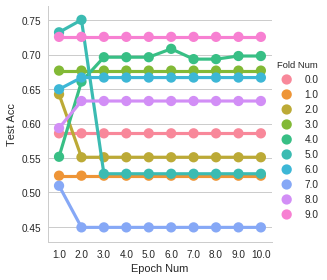

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')

sns.factorplot(x='Epoch Num', y='Test Acc', hue='Fold Num', data=fold_results.aggregate)
plt.show()